In [5]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
# Clean up spaces in description and remove any rows that don't have a valid invoice
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)


df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]


basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))


basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

print(basket_sets)

"""
# calculate occurrence(support) for every product in all transactions
product_support_dict = {}
for column in basket_sets.columns:
    product_support_dict[column] = sum(basket_sets[column]>0)
# visualise support
pd.Series(product_support_dict).plot(kind="bar")
"""



Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                            0                           0   
536852                            0                           0   
536974                            0                           0   
537065                            0                           0   
537463                            0                           0   
537468                            1                           0   
537693                            0                           0   
537897                            0                           0   
537967                            0                           0   
538008                            0                           0   
538093                            0                           0   
538196                            0                           0   
539050                            0                           

'\n# calculate occurrence(support) for every product in all transactions\nproduct_support_dict = {}\nfor column in basket_sets.columns:\n    product_support_dict[column] = sum(basket_sets[column]>0)\n# visualise support\npd.Series(product_support_dict).plot(kind="bar")\n'

In [10]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Advanced and strategical data frequent set selection
frequent_itemsets[ (frequent_itemsets['length'] > 1) &
                   (frequent_itemsets['support'] >= 0.02) ].head()



,support,itemsets,length
40,0.073980,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...",2
41,0.079082,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",2
42,0.073980,"(ALARM CLOCK BAKELIKE RED, ALARM CLOCK BAKELIK...",2
43,0.071429,"(DOLLY GIRL LUNCH BOX, SPACEBOY LUNCH BOX)",2
44,0.089286,"(PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN CIR...",2


In [11]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061


In [12]:
rules.sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061
5,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135
25,(SET/6 RED SPOTTY PAPER PLATES),"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",0.127551,0.102041,0.099490,0.780000,7.644000,0.086474,4.081633


In [13]:
print(rules[(rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8)])

print(len(rules))

                                          antecedents  \
2                          (ALARM CLOCK BAKELIKE RED)   
3                        (ALARM CLOCK BAKELIKE GREEN)   
17                    (SET/6 RED SPOTTY PAPER PLATES)   
18                      (SET/6 RED SPOTTY PAPER CUPS)   
19                    (SET/6 RED SPOTTY PAPER PLATES)   
20  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
21  (SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...   
22  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...   

                             consequents  antecedent support  \
2           (ALARM CLOCK BAKELIKE GREEN)            0.094388   
3             (ALARM CLOCK BAKELIKE RED)            0.096939   
17  (SET/20 RED RETROSPOT PAPER NAPKINS)            0.127551   
18       (SET/6 RED SPOTTY PAPER PLATES)            0.137755   
19         (SET/6 RED SPOTTY PAPER CUPS)            0.127551   
20       (SET/6 RED SPOTTY PAPER PLATES)            0.102041   
21  (SET/20 RED RETROSPOT PAPER NAPKIN

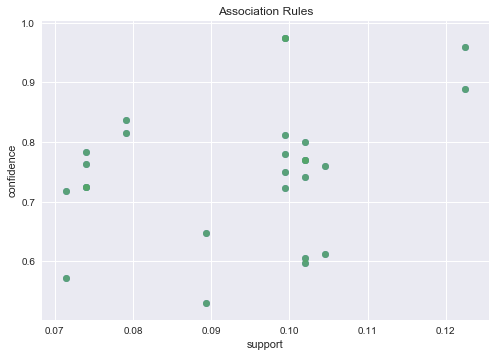

In [16]:
# Visualizing the rules

support=rules.as_matrix(columns=['support'])
confidence=rules.as_matrix(columns=['confidence'])

for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]

plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)
plt.show()
#plt.gcf().clear()